In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
40,457,215,207,6,424,380,357,1661,180,873,1040,5,45,898,6748
41,503,220,207,6,446,400,389,1742,184,911,1107,5,45,937,7102
42,536,229,209,6,488,431,394,1794,187,934,1172,5,45,979,7409
43,560,231,222,6,514,451,432,1905,193,995,1239,5,45,1022,7820
44,586,237,229,6,532,509,464,1949,197,1022,1344,5,51,1056,8187
45,604,239,231,6,542,542,490,2020,198,1051,1399,6,51,1071,8450
46,623,240,231,6,561,562,519,2085,201,1076,1426,6,52,1084,8672
47,640,243,235,6,593,569,550,2174,211,1118,1515,6,54,1124,9038
48,653,248,235,6,619,604,602,2250,214,1155,1604,6,54,1159,9409
49,678,253,235,6,637,606,638,2311,214,1176,1684,6,54,1199,9697


In [6]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
45,40700,8450,915
46,41699,8672,985
47,43309,9038,1062
48,44799,9409,1120
49,46089,9697,1184
50,47749,10051,1231
51,49157,10324,1249
52,50294,10521,1262
53,51499,10721,1332
54,53082,11034,1415


## National Statistics

### total number of cases over time

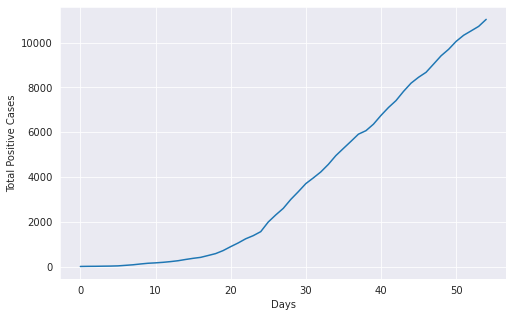

In [7]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

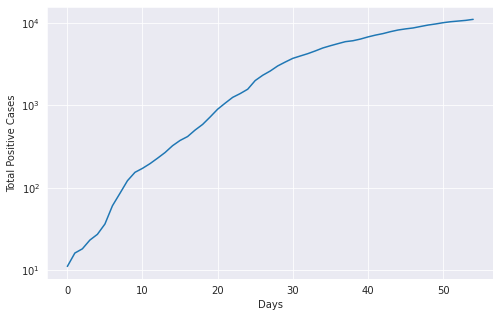

In [8]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

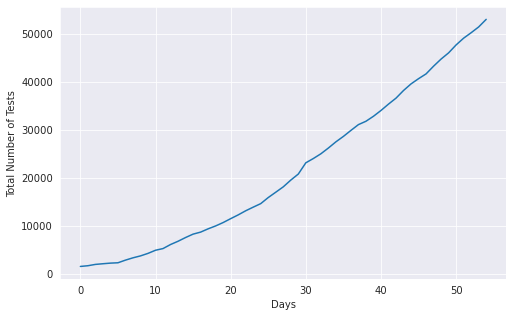

In [9]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [10]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

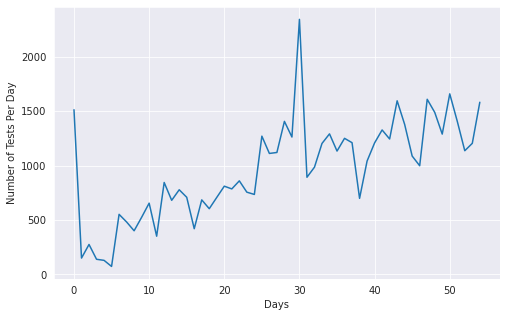

In [11]:
num_test_per_day.plot(figsize=(8, 5))
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

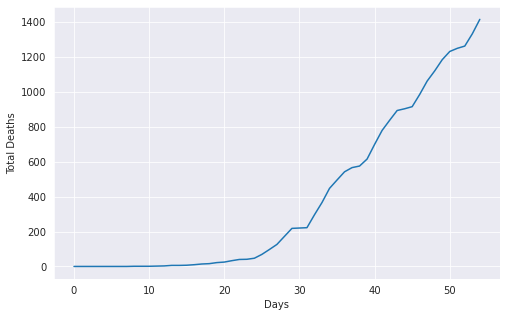

In [12]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

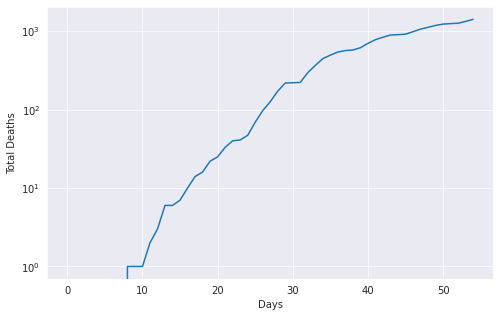

In [13]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

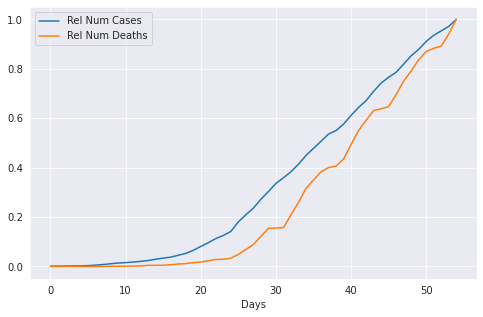

In [14]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

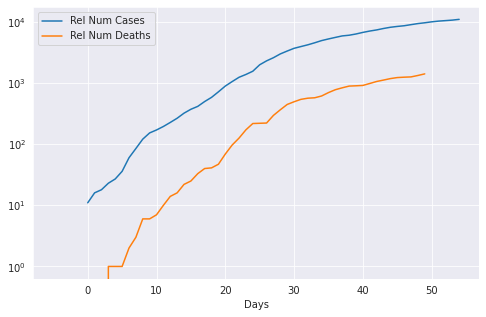

In [15]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day percentage rise in cases?

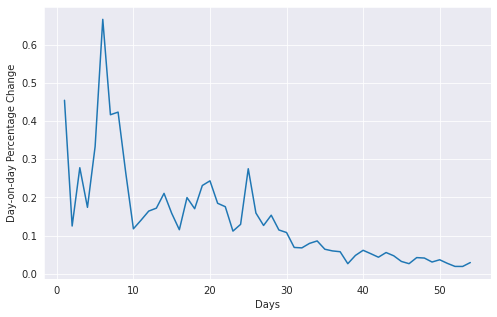

In [16]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

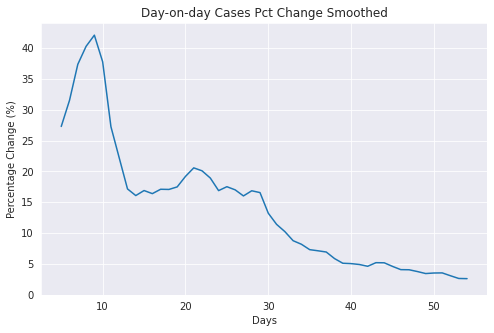

In [17]:
df_total['Total Positive Cases'].pct_change().rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [18]:
df_total['Total Positive Cases'].pct_change()[-7:]

48    0.041049
49    0.030609
50    0.036506
51    0.027161
52    0.019082
53    0.019010
54    0.029195
Name: Total Positive Cases, dtype: float64

In [19]:
df_total['Total Positive Cases'].pct_change().describe()

count    54.000000
mean      0.142892
std       0.128821
min       0.019010
25%       0.049088
50%       0.114955
75%       0.175206
max       0.666667
Name: Total Positive Cases, dtype: float64

In [20]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
45,0.030717,0.008439,0.008734,0.0,0.018797,0.064833,0.056034,0.036429,0.005076,0.028376,0.040923,0.200000,0.000000,0.014205,0.032124
46,0.031457,0.004184,0.000000,0.0,0.035055,0.036900,0.059184,0.032178,0.015152,0.023787,0.019299,0.000000,0.019608,0.012138,0.026272
47,0.027287,0.012500,0.017316,0.0,0.057041,0.012456,0.059730,0.042686,0.049751,0.039033,0.062412,0.000000,0.038462,0.036900,0.042205
48,0.020312,0.020576,0.000000,0.0,0.043845,0.061511,0.094545,0.034959,0.014218,0.033095,0.058746,0.000000,0.000000,0.031139,0.041049
49,0.038285,0.020161,0.000000,0.0,0.029079,0.003311,0.059801,0.027111,0.000000,0.018182,0.049875,0.000000,0.000000,0.034513,0.030609
50,0.020649,0.019763,0.008511,0.0,0.025118,0.080858,0.097179,0.050627,0.028037,0.009354,0.027316,0.166667,0.000000,0.020851,0.036506
51,0.018786,0.003876,0.012658,0.0,0.029096,0.010687,0.068571,0.021005,0.022727,0.037068,0.031792,0.000000,0.000000,0.022059,0.027161
52,0.022695,0.038610,0.012500,0.0,0.013393,0.027190,0.030749,0.020976,0.013333,0.027620,0.010644,0.000000,0.000000,0.007994,0.019082
53,0.023578,0.011152,0.000000,0.0,0.016153,0.013235,0.014267,0.028842,0.017544,0.025296,0.015521,0.000000,0.000000,0.009516,0.019010
54,0.009485,0.025735,0.004115,0.0,0.028902,0.040639,0.039642,0.026114,0.017241,0.024672,0.040939,0.000000,0.000000,0.031422,0.029195


In [21]:
df_cases.pct_change().rolling(5).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
45,0.057637,0.021462,0.022426,0.0,0.050630,0.073994,0.065809,0.040003,0.019283,0.037919,0.061195,0.040000,0.026667,0.035930,0.046043
46,0.043797,0.017648,0.022426,0.0,0.047264,0.070848,0.059718,0.036686,0.017869,0.033971,0.052170,0.040000,0.030588,0.029671,0.040806
47,0.036133,0.011966,0.023956,0.0,0.039838,0.057839,0.069094,0.039253,0.024558,0.036728,0.052909,0.040000,0.038281,0.028087,0.040601
48,0.031240,0.014335,0.011516,0.0,0.037952,0.060861,0.068714,0.033870,0.020984,0.030285,0.053225,0.040000,0.038281,0.025530,0.037716
49,0.029612,0.013172,0.005210,0.0,0.036763,0.035802,0.065859,0.034673,0.016839,0.028495,0.046251,0.040000,0.011614,0.025779,0.034452
50,0.027598,0.015437,0.005165,0.0,0.038028,0.039007,0.074088,0.037512,0.021432,0.024690,0.043530,0.033333,0.011614,0.027108,0.035328
51,0.025064,0.015375,0.007697,0.0,0.036836,0.033765,0.075965,0.035278,0.022947,0.027346,0.046028,0.033333,0.007692,0.029092,0.035506
52,0.024145,0.020597,0.006734,0.0,0.028106,0.036712,0.070169,0.030936,0.015663,0.025064,0.035675,0.033333,0.000000,0.023311,0.030881
53,0.024799,0.018713,0.006734,0.0,0.022568,0.027056,0.054113,0.029712,0.016328,0.023504,0.027030,0.033333,0.000000,0.018986,0.026474
54,0.019039,0.019827,0.007557,0.0,0.022532,0.034522,0.050082,0.029513,0.019777,0.024802,0.025242,0.033333,0.000000,0.018368,0.026191


### What is the day-on-day percentage rise in deaths?

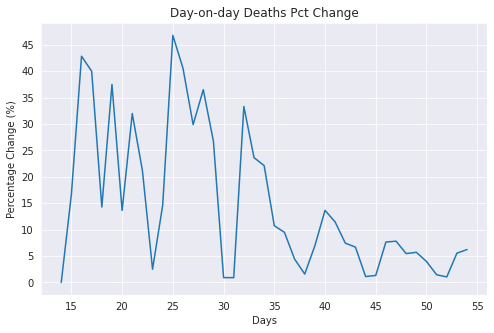

In [22]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

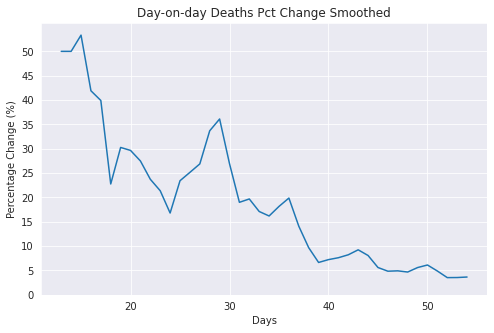

In [23]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [24]:
death_pct_change[-10:]

45    0.013289
46    0.076503
47    0.078173
48    0.054614
49    0.057143
50    0.039696
51    0.014622
52    0.010408
53    0.055468
54    0.062312
Name: Total Deaths, dtype: float64

In [25]:
death_pct_change.describe()

count    47.000000
mean           inf
std            NaN
min       0.000000
25%       0.041988
50%       0.107383
75%       0.309485
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

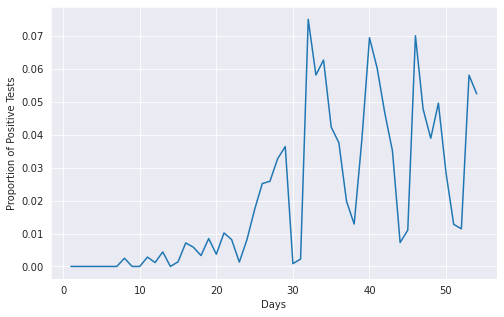

In [26]:
prop_pos = (df_total['Total Deaths'].diff() / df_total['Total Tests'].diff()).dropna()

prop_pos.plot(figsize=(8, 5))
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

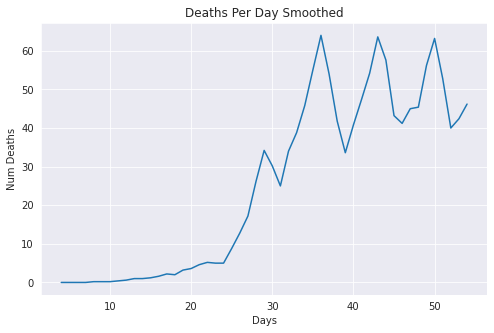

In [27]:
# remove first 13 points because they have nothing
death_per_day = df_total['Total Deaths'].diff().fillna(0)
death_per_day.rolling(5).mean().plot(figsize=(8, 5))
plt.title('Deaths Per Day Smoothed')
plt.ylabel('Num Deaths')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

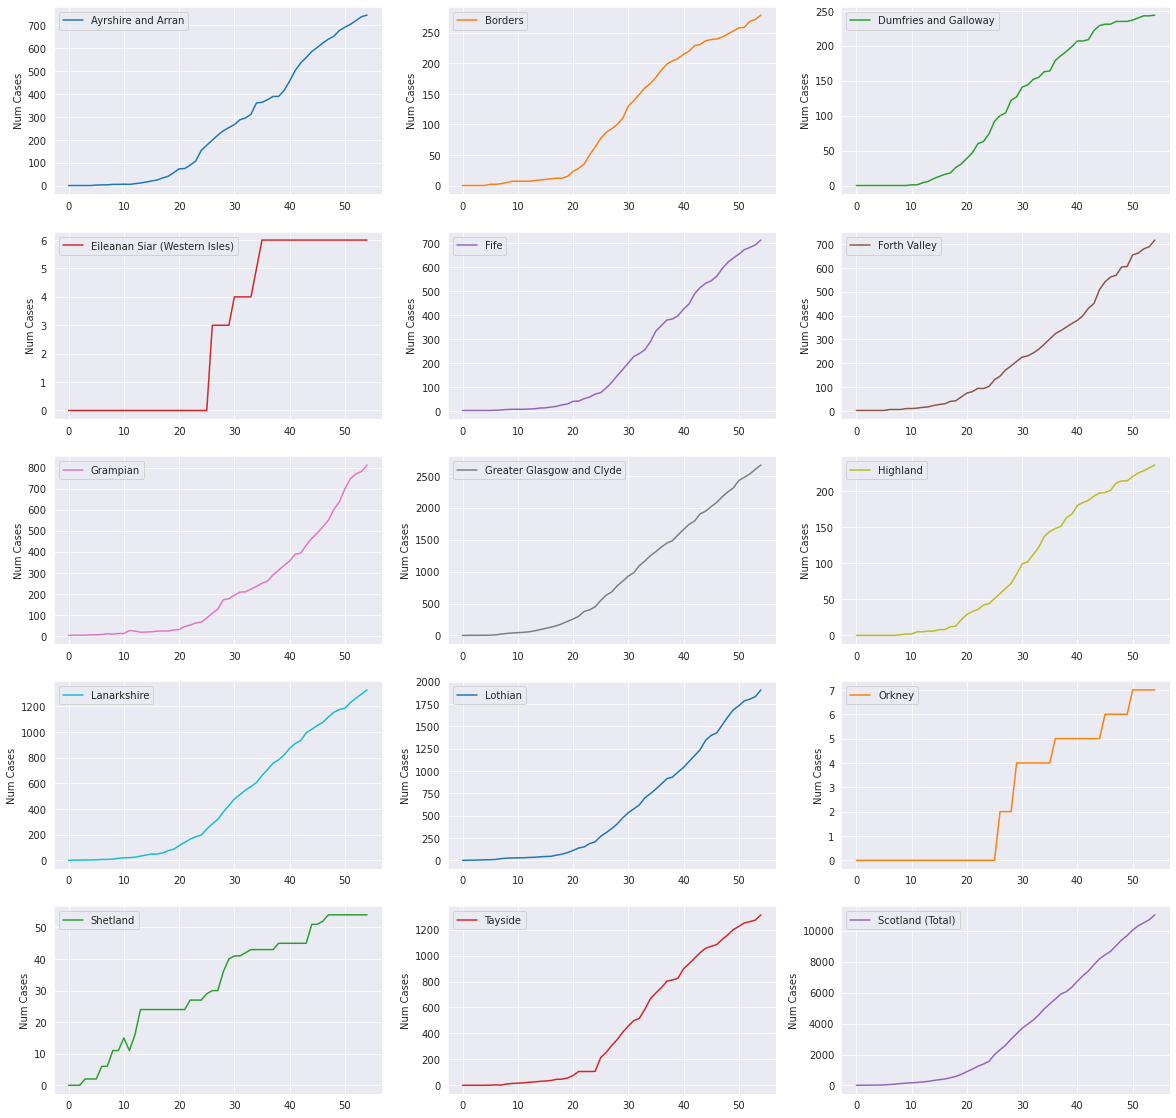

In [28]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

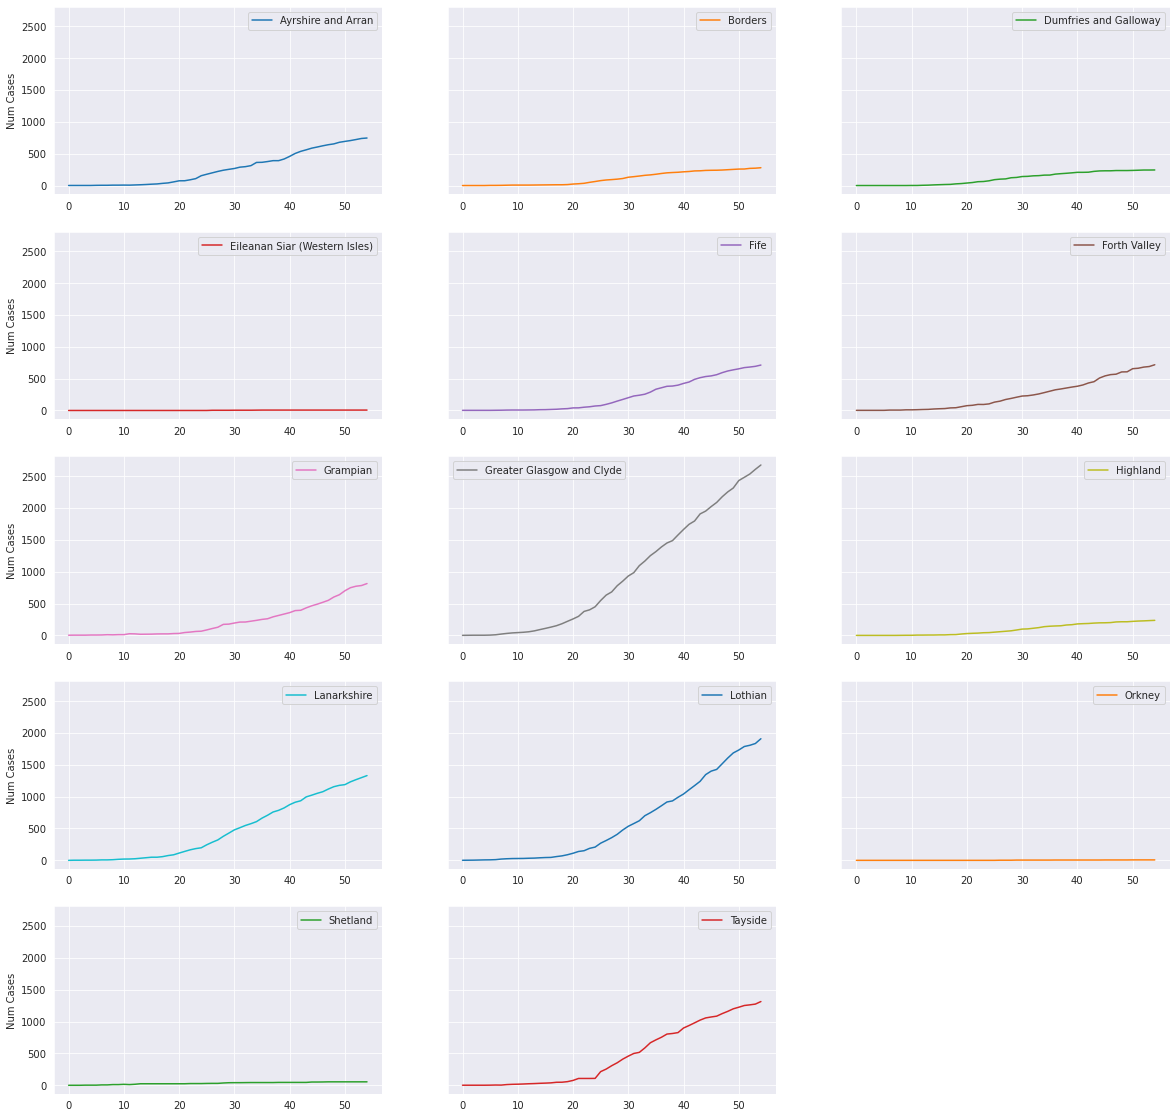

In [29]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [30]:
194 / 178

1.0898876404494382

In [31]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [32]:
df_cases_rel = df_cases / df_pop.values.T * 100000

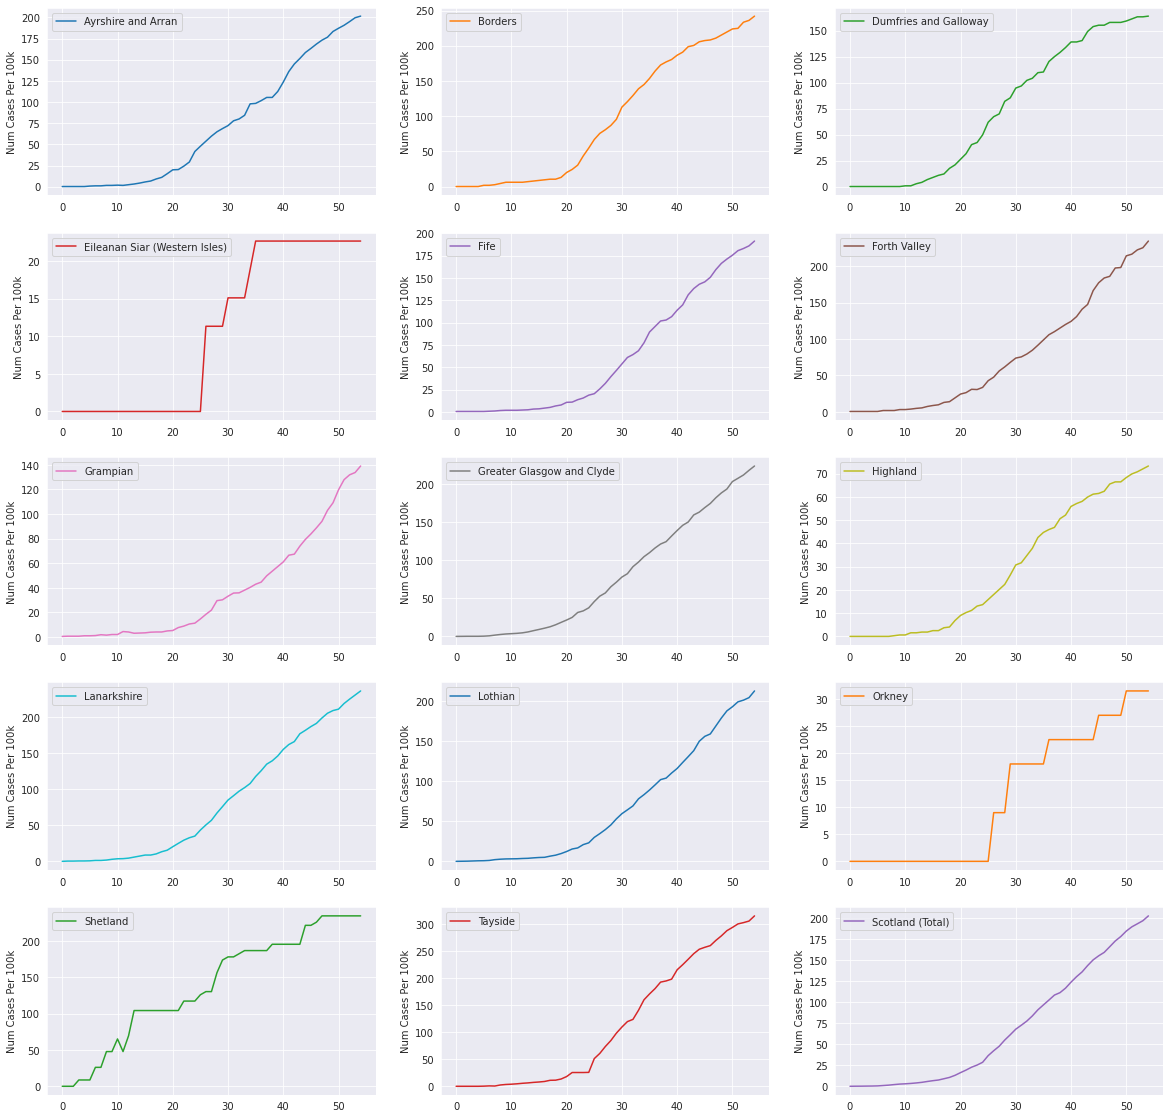

In [33]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

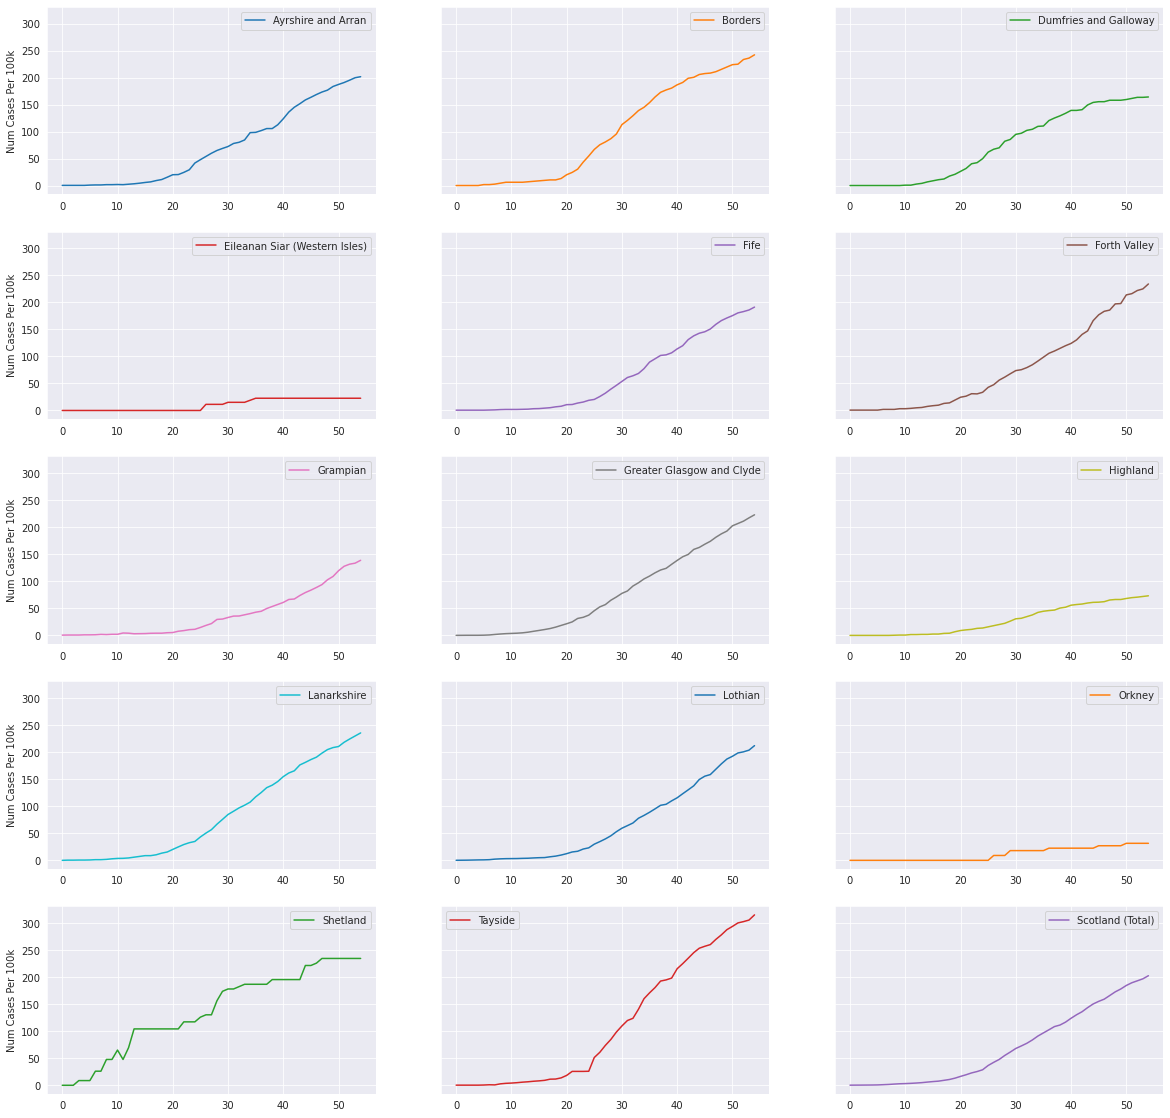

In [34]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

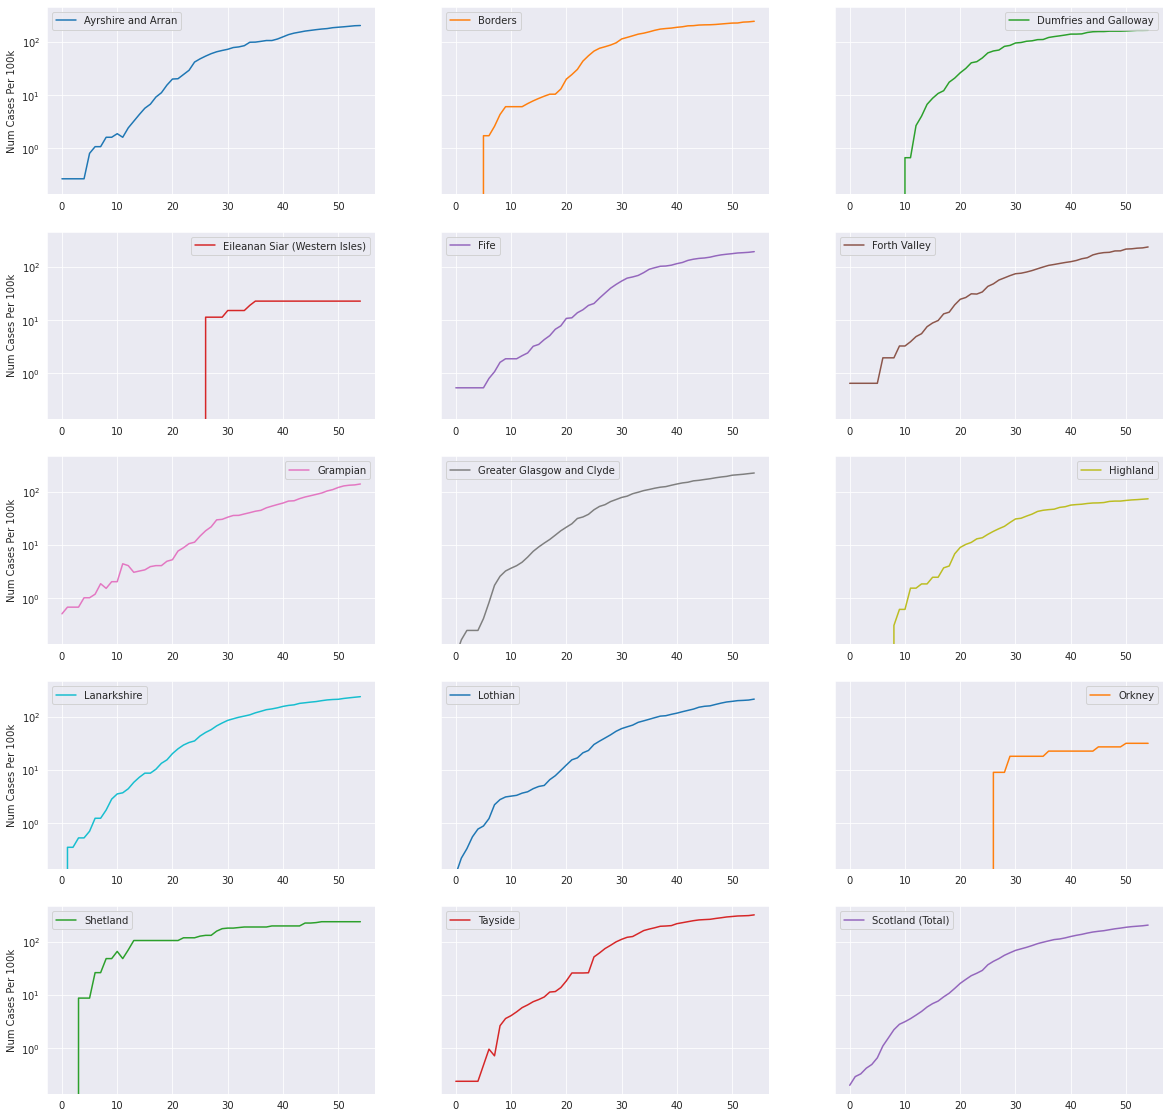

In [35]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

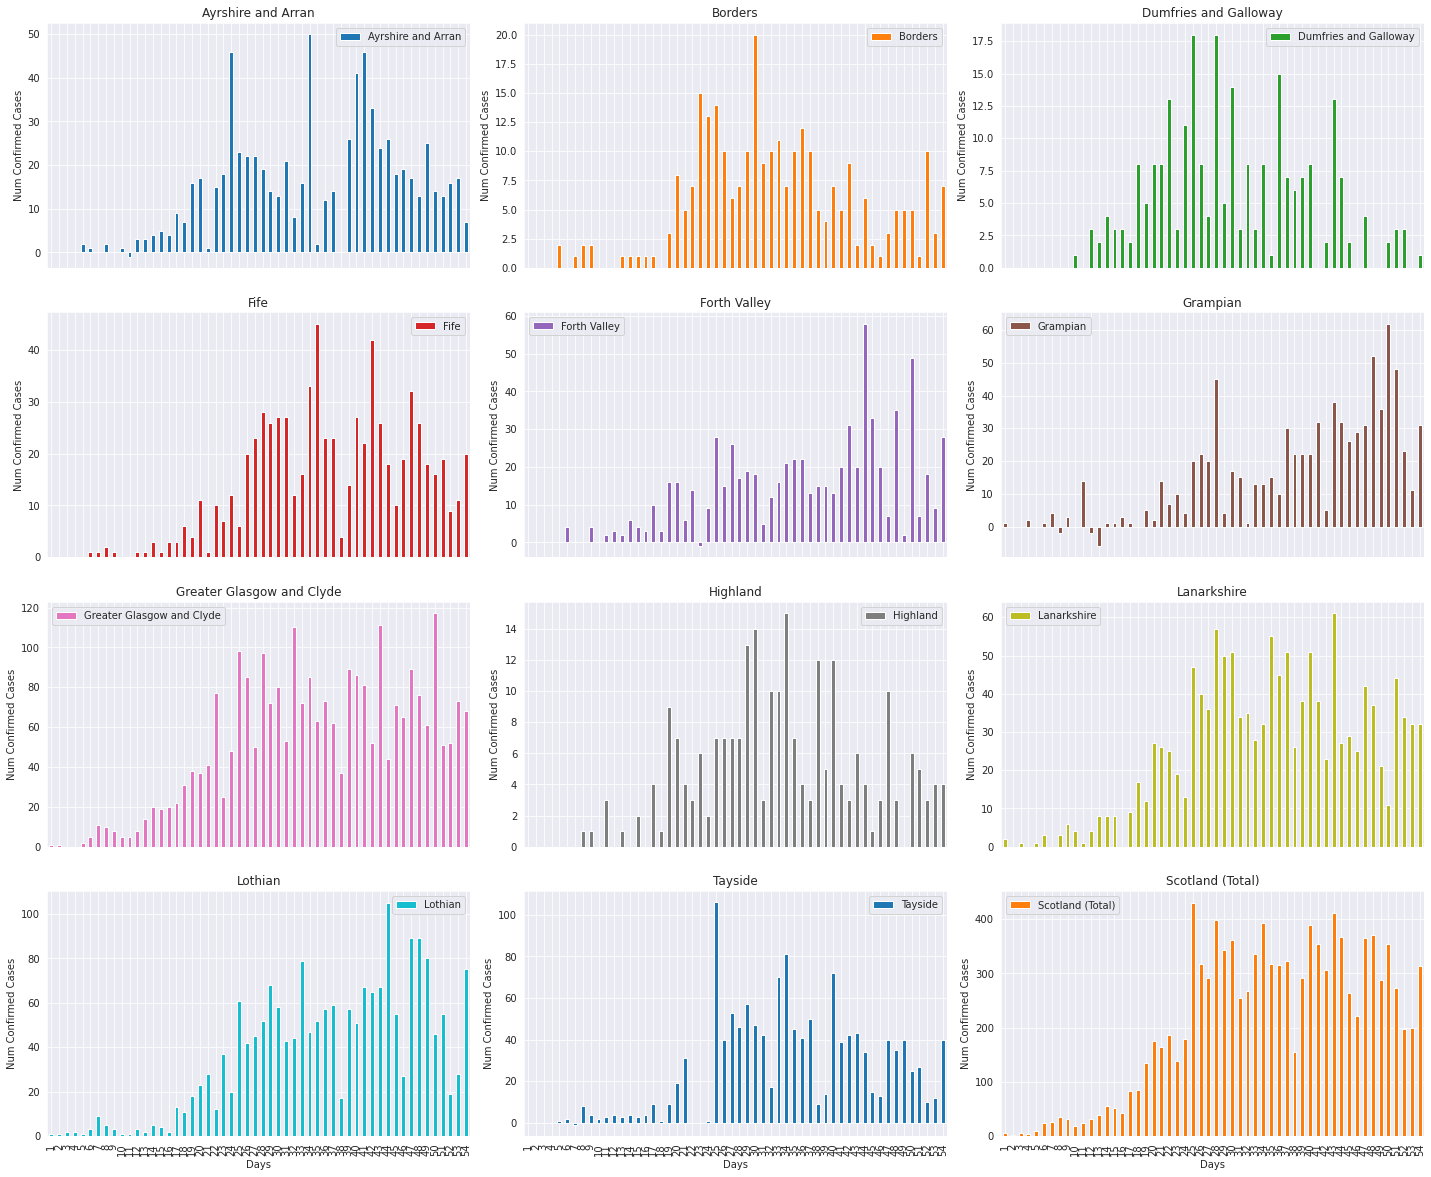

In [36]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

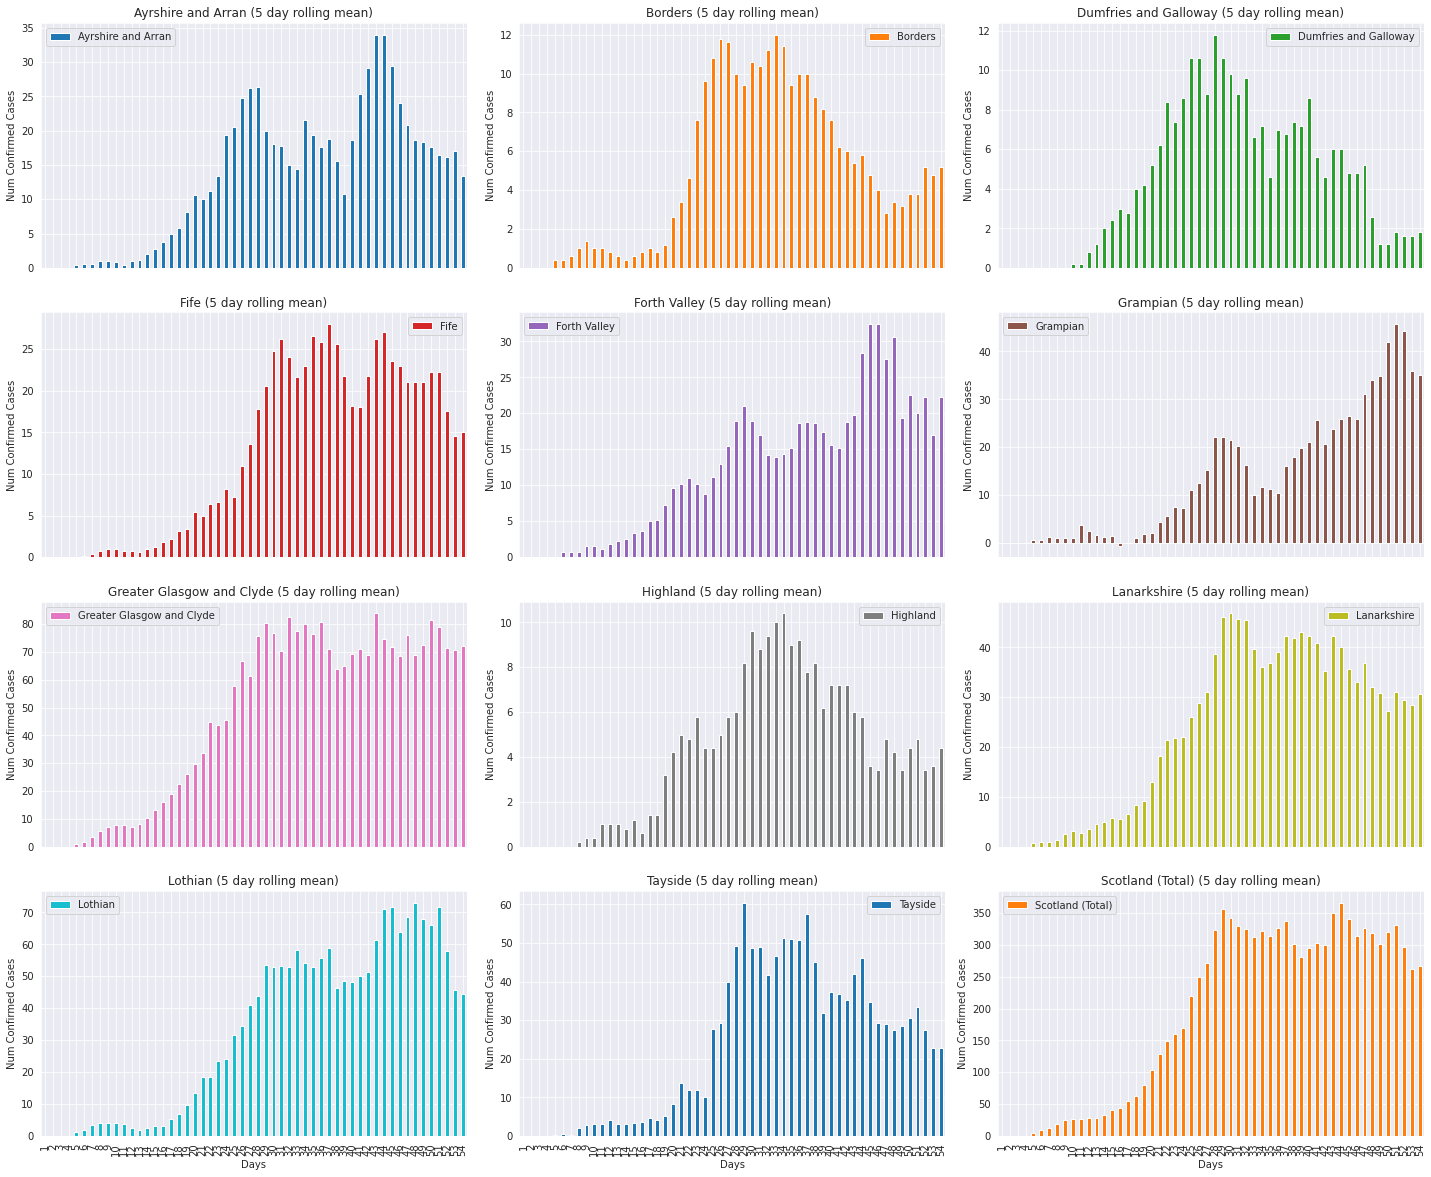

In [37]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(5).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + ' (5 day rolling mean)')
plt.tight_layout()
plt.show()

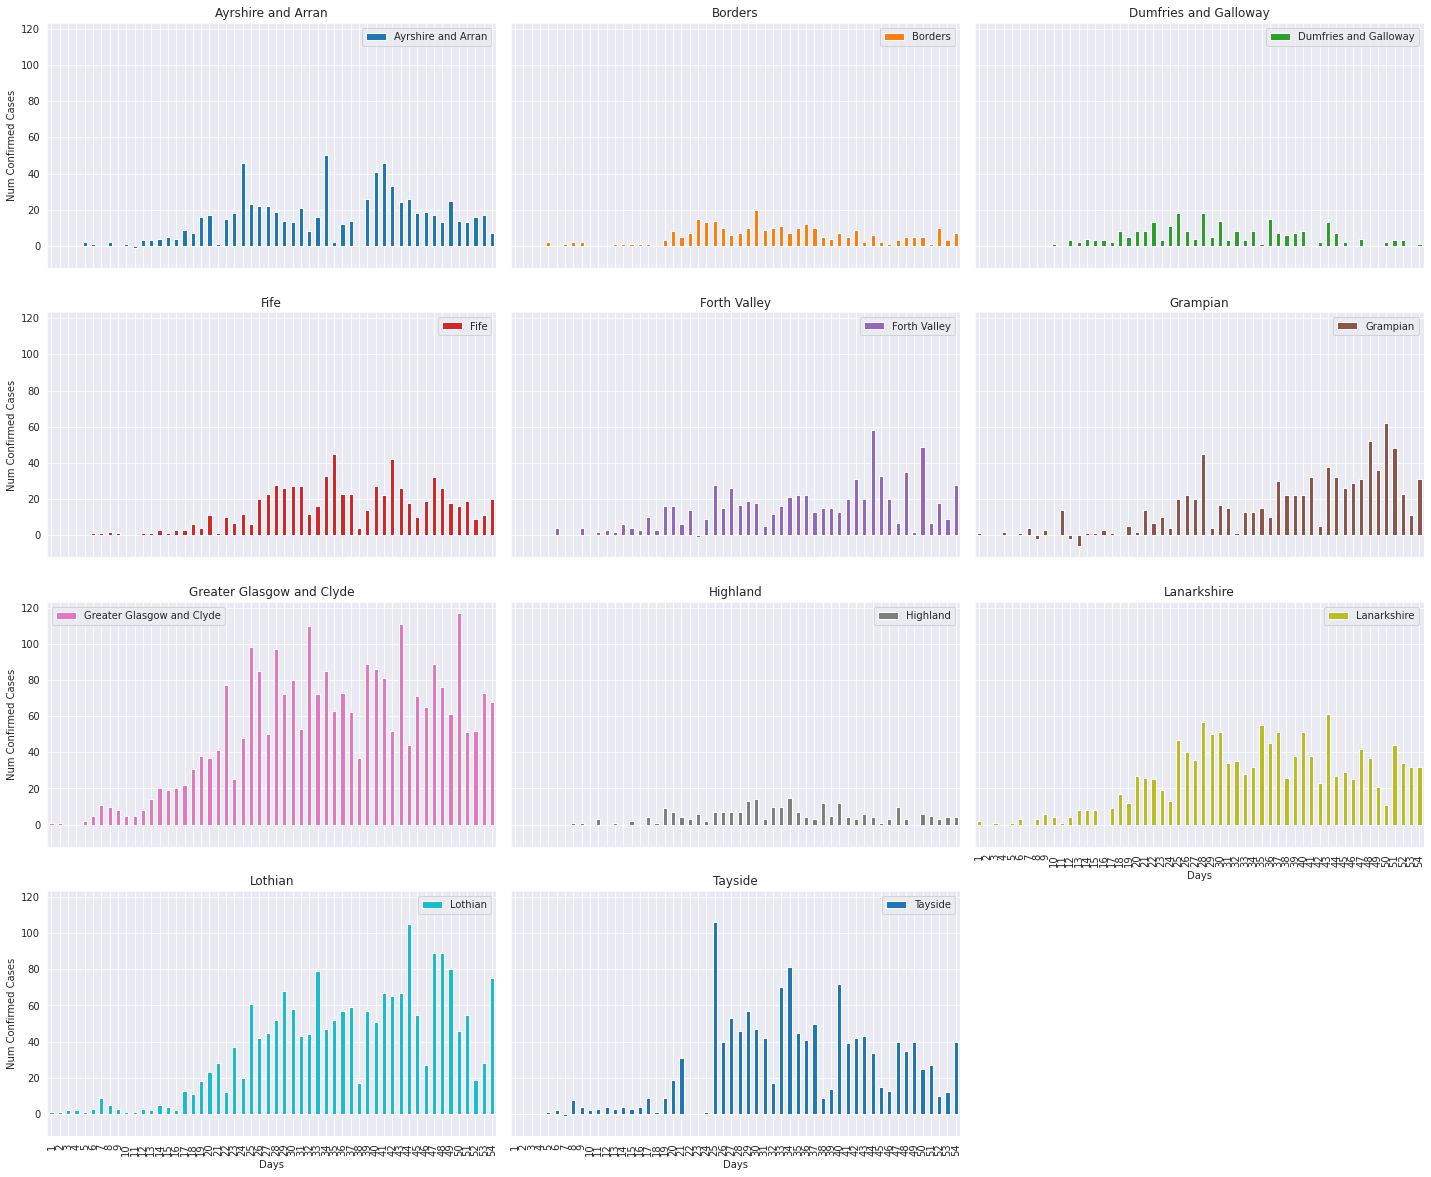

In [38]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [39]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

In [40]:
df_cases_rel.idxmax(1)

0     Forth Valley
1         Grampian
2         Grampian
3         Shetland
4         Shetland
5         Shetland
6         Shetland
7         Shetland
8         Shetland
9         Shetland
10        Shetland
11        Shetland
12        Shetland
13        Shetland
14        Shetland
15        Shetland
16        Shetland
17        Shetland
18        Shetland
19        Shetland
20        Shetland
21        Shetland
22        Shetland
23        Shetland
24        Shetland
25        Shetland
26        Shetland
27        Shetland
28        Shetland
29        Shetland
30        Shetland
31        Shetland
32        Shetland
33        Shetland
34        Shetland
35        Shetland
36        Shetland
37         Tayside
38        Shetland
39         Tayside
40         Tayside
41         Tayside
42         Tayside
43         Tayside
44         Tayside
45         Tayside
46         Tayside
47         Tayside
48         Tayside
49         Tayside
50         Tayside
51         Tayside
52         T

In [41]:
df_cases.drop(columns='Scotland (Total)').idxmax(1)

0                      Grampian
1                      Grampian
2                      Grampian
3                       Lothian
4                       Lothian
5                       Lothian
6                       Lothian
7     Greater Glasgow and Clyde
8     Greater Glasgow and Clyde
9     Greater Glasgow and Clyde
10    Greater Glasgow and Clyde
11    Greater Glasgow and Clyde
12    Greater Glasgow and Clyde
13    Greater Glasgow and Clyde
14    Greater Glasgow and Clyde
15    Greater Glasgow and Clyde
16    Greater Glasgow and Clyde
17    Greater Glasgow and Clyde
18    Greater Glasgow and Clyde
19    Greater Glasgow and Clyde
20    Greater Glasgow and Clyde
21    Greater Glasgow and Clyde
22    Greater Glasgow and Clyde
23    Greater Glasgow and Clyde
24    Greater Glasgow and Clyde
25    Greater Glasgow and Clyde
26    Greater Glasgow and Clyde
27    Greater Glasgow and Clyde
28    Greater Glasgow and Clyde
29    Greater Glasgow and Clyde
30    Greater Glasgow and Clyde
31    Gr

### Log Growth Curves for Each Region

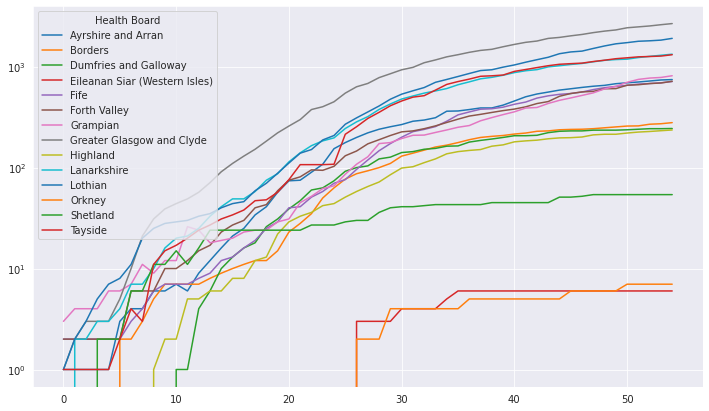

In [42]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

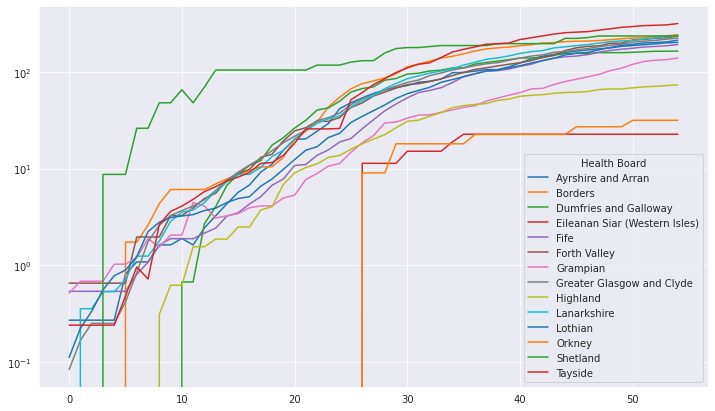

In [43]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()